In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


# U Matrix Representation
![U Matrix](https://miro.medium.com/max/825/0*NDU-Hc3tGz4XZXHh.png)

**U matrix which is comming as a visualization technique for Self Organized Maps, depicts the distance between the nodes of a SOM. Here, when plotted, darker areas of the matrix are far away from each other.**

This Notebook includes an impelementation of U Matrix and Vector Field Visualizations for Self Organised Map generated for Iris Dataset.
> **Contents**
> * 1. Libraries and Initial Configurations
> * 2. Data Pre-Processing
> * 3. Using Libraries to Train and Visualize SOM with U Matrix
> * 4. Implementing from Scratch (Used functions from https://www.kaggle.com/warunaw/self-organizing-maps)
> * 5. Vector Fields for SOM

# 1. Import Libraries and Data setting initial configurations

In [2]:
import pandas as pd
import numpy as np

In [3]:
dataset = pd.read_csv('../input/iris/Iris.csv')
dataset.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
labels = dataset['Species'] 
c = labels.astype('category')
labels = c.cat.codes
class_names = c.cat.categories
labels.head(5)
dataset = dataset.drop(columns=['Id','Species'], axis=1)

In [6]:
class_names

Index(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='object')

In [7]:
som_width = 20
som_length = 20
epochs = 50000
initial_learning_rate=0.01

# 2. Pre-Processing the Data

In [8]:

from sklearn.preprocessing import MinMaxScaler
dataset= pd.DataFrame(MinMaxScaler(feature_range=(0, 1)).fit_transform(dataset.values))
dataset.head()

,0,1,2,3
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


# 3. Using Libraries to Train and Visualize SOM with U Matrix

## 3.1 Using MiniSom

In [9]:
!pip install minisom
from minisom import MiniSom

  Created wheel for minisom: filename=MiniSom-2.2.9-py3-none-any.whl size=8603 sha256=2127c334f196da5bb5435c32f67924563c0a3067a375444a66c5cb756a353931
  Stored in directory: /root/.cache/pip/wheels/3d/a1/10/f50b6f4865652eac239a2700de411c3078c27e1318320e494c
Successfully built minisom


In [10]:
mini_som_net = MiniSom(som_length, som_width, 4, sigma=3, learning_rate =0.05, neighborhood_function='gaussian') 
mini_som_net.train_random(dataset.to_numpy(), 100000)

### 3.1.1 U Matrix

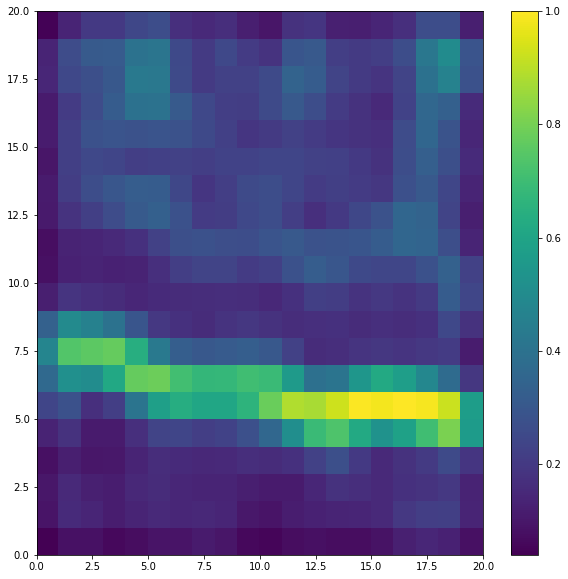

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
plt.pcolor(mini_som_net.distance_map().T, cmap= 'viridis' )
plt.colorbar()

### 3.1.2 U Matrix with Winner Neurons of each data point marked with its Class

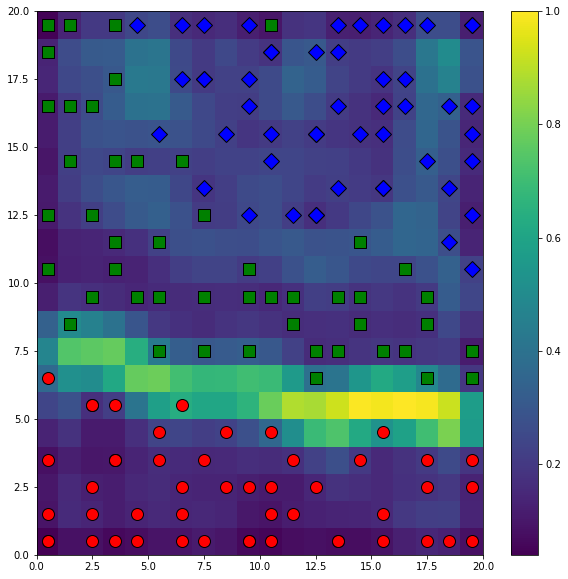

In [12]:

markers = ['o','s','D']
colors = ['r','g','b']
plt.figure(figsize=(10,10))
plt.pcolor(mini_som_net.distance_map().T, cmap= 'viridis' )
plt.colorbar()

for cnt,xx in enumerate(dataset.to_numpy()):
    w = mini_som_net.winner(xx)
    plt.plot(w[0]+.5,w[1]+.5,markers[labels[cnt]],markersize=12, markerfacecolor=colors[labels[cnt]], markeredgecolor='k')


## 3.2 Using Simpson

In [13]:
!pip install SimpSOM
import SimpSOM as sps

  Created wheel for SimpSOM: filename=SimpSOM-1.3.4-py3-none-any.whl size=17084 sha256=d3af599c2ed2a0b8f69227e5212c70335ee67f1f5f16da7da2637954724923af
  Stored in directory: /root/.cache/pip/wheels/22/93/66/28200809b28a3685b5040db97cbc27ddd8b1a6372101244102
Successfully built SimpSOM


Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done!


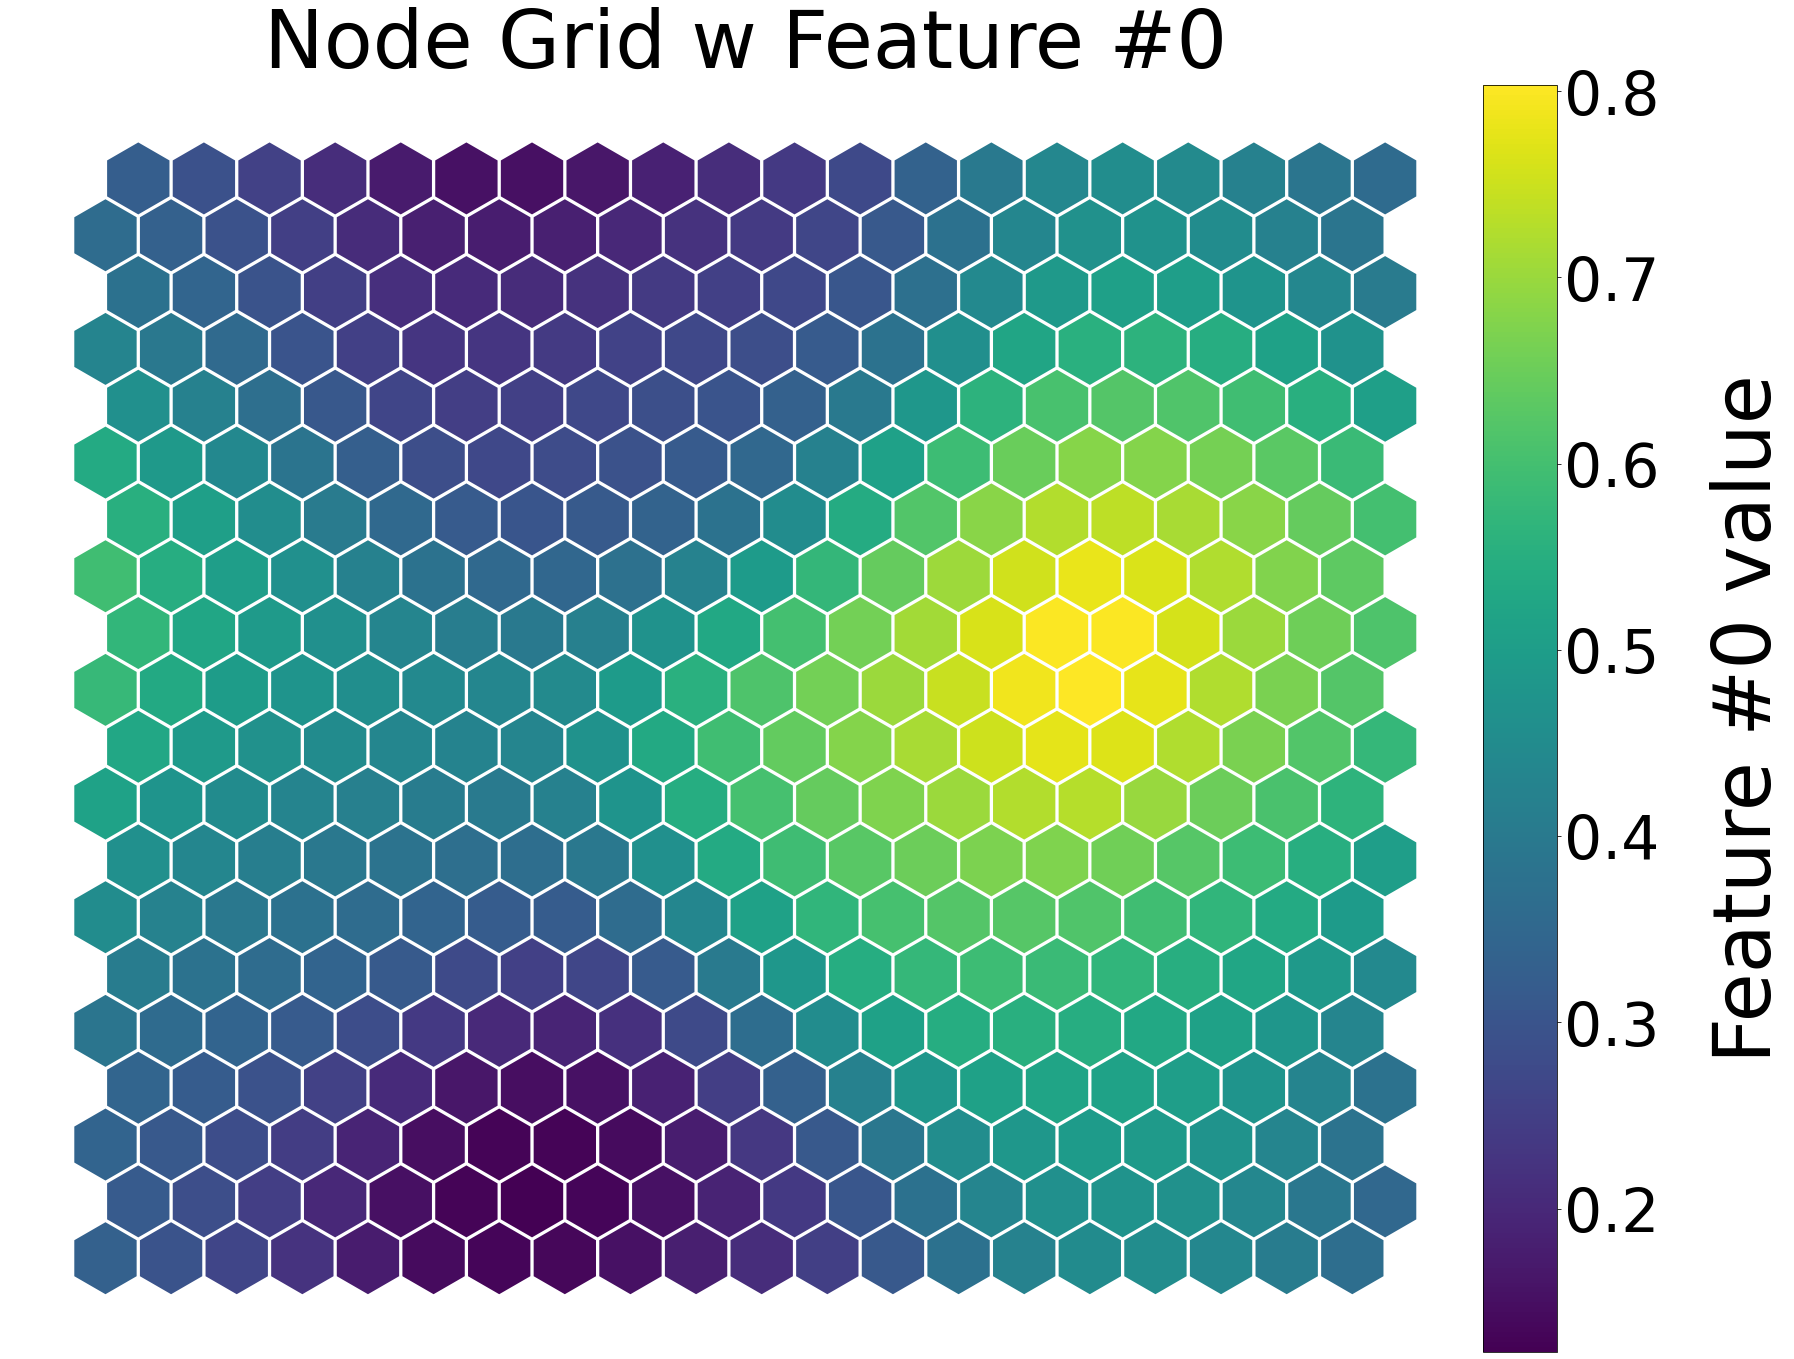

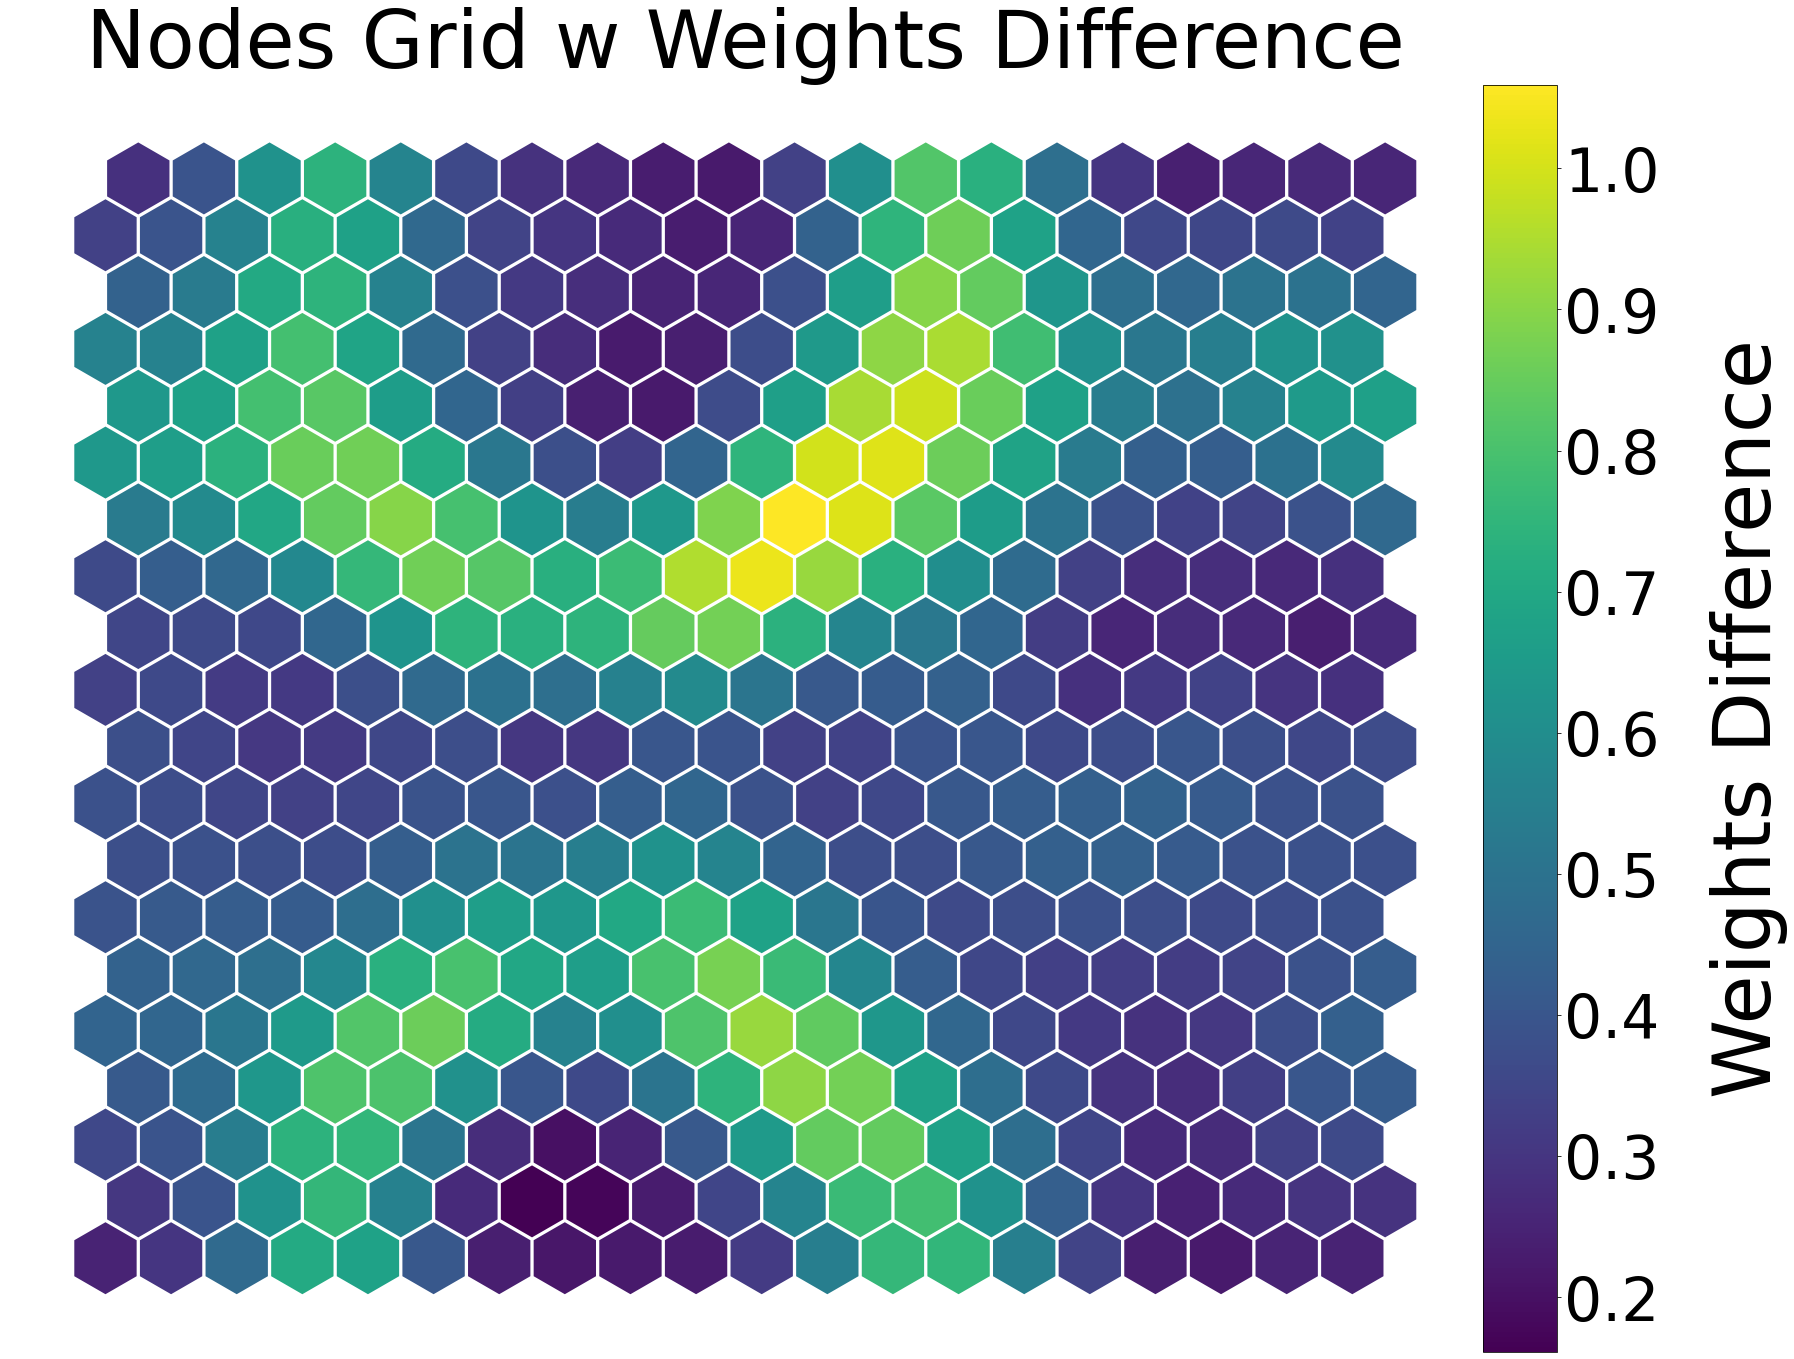

In [14]:
simp_net = sps.somNet(som_width, som_length, dataset.to_numpy(), PBC=True)
simp_net.train(0.01, 10000)

simp_net.nodes_graph(colnum=0)
simp_net.diff_graph()

# 4. Implementing from Scratch

In [15]:
initial_radius = max(som_width, som_length)/2
time_const =  epochs/np.log(initial_radius)
som_net = np.random.random((som_width, som_length, 4))

Following Helper Functions are Referenced from https://www.kaggle.com/warunaw/self-organizing-maps

In [16]:
def update_radius(initial_radius, i, time_const):
    return initial_radius * np.exp(-i / time_const)

def update_learning_rate(initial_learning_rate, i, n_iterations):
    return initial_learning_rate * np.exp(-i / n_iterations)

def calculate_euclidian_dis(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def find_best_matching_Unit(data_point):
    bmu_pos = np.array([0, 0])
    min_dist = np.iinfo(np.int).max
    input_dim = len(data_point)
    
    for x in range(som_width):
        for y in range(som_length):
            som_weight_vector = som_net[x, y, :].reshape(1, 4)
            euclidian_dist = calculate_euclidian_dis(som_weight_vector, data_point)
            if euclidian_dist < min_dist:
                min_dist = euclidian_dist
                bmu_pos = np.array([x, y])
    
    bmu = som_net[bmu_pos[0], bmu_pos[1], :].reshape(1, 4)
    return (bmu, bmu_pos)

def neighbourhood_function(bmu_location, selected_node_location, radius):
    euclidien_dist_to_bmu = calculate_euclidian_dis(bmu_location, selected_node_location)
    return np.exp(-euclidien_dist_to_bmu / (2* (radius**2)))

Following Cell train the SOM weights

In [17]:
#shuffling the data set
dataset_shuff = dataset.sample(frac=1)

for i in range(epochs):
    rand_point = np.array(dataset_shuff.sample())
    bmu, bmu_idx = find_best_matching_Unit(rand_point)

    new_radius = update_radius(initial_radius, i, time_const)
    new_learning_rate = update_learning_rate(initial_learning_rate, i, epochs)
    #Updating the som net throughout  radius
    for x in range(som_width):
        for y in range(som_length):
            w = som_net[x, y, :].reshape(1, 4)
            w_dist = calculate_euclidian_dis(np.array([x, y]), bmu_idx)
            #Update if the modification falls within the circle
            if w_dist <= new_radius:
                influence = neighbourhood_function(bmu, w, new_radius)
                new_w = w + (new_learning_rate * influence * (rand_point - w))
                som_net[x, y, :] = new_w.reshape(1, 4)    

Following cell Create the U Matrix

In [18]:
u_matrix = np.zeros((som_width, som_length))

for x in range(0, som_width):
    for y in range(0, som_length):
        neighbour_list = list()
        #Finding the Neighbor indexs for (x, y) and making a list of them.
        for u in range(x-1, x+2):
            if (u < 0 or u > (som_width-1)):
                continue
            for v in range(y-1, y+2):
                if(v < 0 or v > (som_length-1)):
                    continue
                if (u == x and v == y):
                    continue
                neighbour_list.append(np.array([u,v]))

        sum=0
        for idx in neighbour_list:
            sum += calculate_euclidian_dis(som_net[x,y,:], som_net[idx[0],idx[1],:])
        
        avg = sum/len(neighbour_list)
        u_matrix[x-1,y-1] = avg

## 4.1 U Matrix

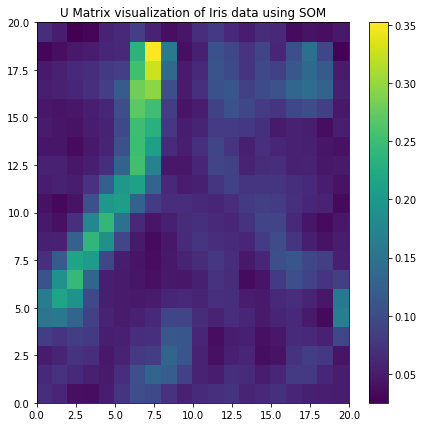

In [19]:
from matplotlib import pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(7,7))
plt.title("U Matrix visualization of Iris data using SOM")
plt.pcolor(u_matrix.T, cmap="viridis")
plt.colorbar()

## 4.2 U Matrix with Winner Neurons of each data point marked with its Class

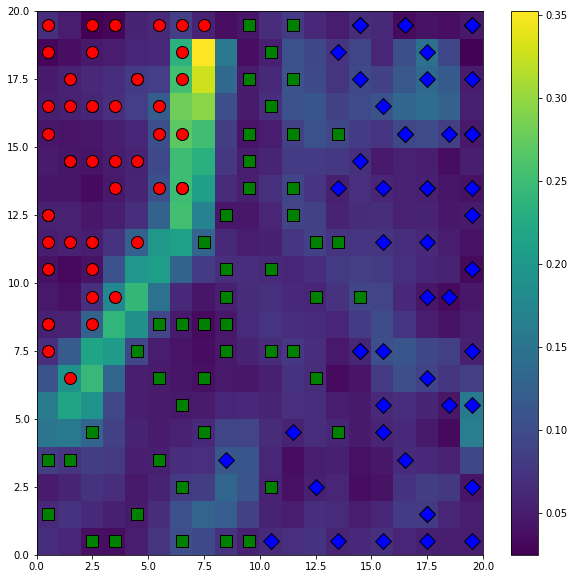

In [20]:
from matplotlib import pyplot as plt
import seaborn as sns

markers = ['o','s','D']
colors = ['r','g','b']
plt.figure(figsize=(10,10))
plt.pcolor(u_matrix.T, cmap= 'viridis' )
plt.colorbar()

for cnt,xx in enumerate(dataset.to_numpy()):
    w = find_best_matching_Unit(np.array(xx))[1]
    plt.plot(w[0]+.5,w[1]+.5,markers[labels[cnt]],markersize=12, markerfacecolor=colors[labels[cnt]],  markeredgecolor='k')


# 5 Vector Field for SOM Generated in Section 4

Based on the U Matrix Implementation, for vector fields other than taking the distance, the direction is computed. Here for each node a vector is generated proportional to distance as in U matrix and direction across u,v axes are depicted. 

In [21]:
vector_map = np.zeros((som_width, som_length,2))

for x in range(0, som_width):
    for y in range(0, som_length):
        neighbour_list = list()
        #Finding the Neighbor indexs for (x, y) and making a list of them.
        for u in range(x-1, x+2):
            if (u < 0 or u > (som_width-1)):
                continue
            for v in range(y-1, y+2):
                if(v < 0 or v > (som_length-1)):
                    continue
                if (u == x and v == y):
                    continue
                neighbour_list.append(np.array([u,v]))

        sum_dis=0
        x_dir = 0
        y_dir = 0
        avg_dis = 0
        u = 0
        v = 0
        for idx in neighbour_list:
            dist = calculate_euclidian_dis(som_net[x,y,:], som_net[idx[0],idx[1],:])
            x_dir += dist*((idx[0] - x)/np.sqrt((idx[0] - x)**2 + (idx[1] - y)**2))
            y_dir += dist*((idx[1] - y)/np.sqrt((idx[0] - x)**2 + (idx[1] - y)**2))
            sum_dis += dist
        avg_dis = sum_dis/len(neighbour_list)
        u = avg_dis*(x_dir/(np.sqrt(x_dir**2 + y_dir**2)))
        v = avg_dis*(y_dir/(np.sqrt(x_dir**2 + y_dir**2)))
        vector_map[x-1,y-1,0] = u
        vector_map[x-1,y-1,1] = v

In [22]:
x,y = np.meshgrid(np.arange(0,som_width , 1), np.arange(0, som_length, 1))

In [23]:
u,v=vector_map.reshape(-1,2).T
u = u.reshape(som_width, som_width)
v = v.reshape(som_length, som_length)

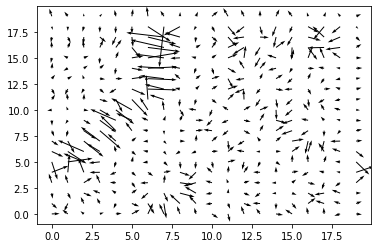

In [24]:
plt.quiver(y,x,u,v,angles = 'uv')